In [3]:
import numpy as np
import proplot as pplt
import meds
import fitsio
import glob
import tqdm

In [99]:
fnames = glob.glob("cat_*.fits")
print(fnames)
d = np.hstack([fitsio.read(f) for f in tqdm.tqdm(fnames)])

['cat_000001.fits', 'cat_000002.fits', 'cat_000003.fits']


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:19<00:00,  6.58s/it]


(array([2.640000e+02, 1.139310e+06, 2.057326e+06, 4.501390e+05,
        6.299300e+04, 3.127000e+03, 4.340000e+02, 1.020000e+02,
        2.200000e+01, 5.000000e+00]),
 array([0.16088482, 0.2291877 , 0.29749058, 0.36579346, 0.43409635,
        0.50239923, 0.57070211, 0.63900499, 0.70730787, 0.77561075,
        0.84391363]),
 <BarContainer object of 10 artists>)

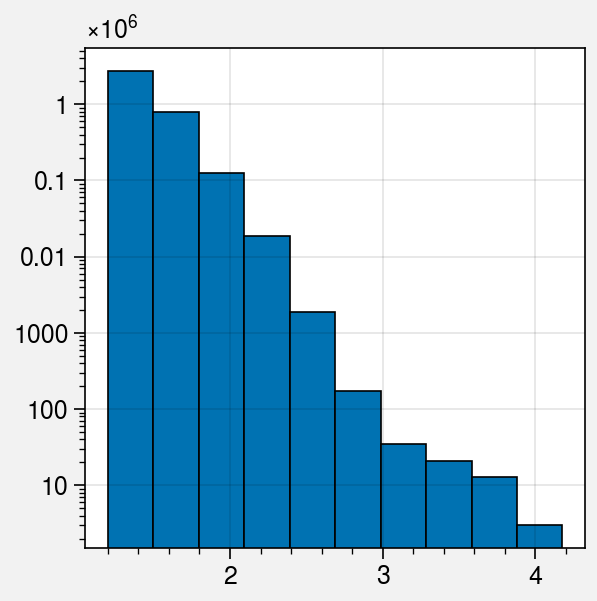

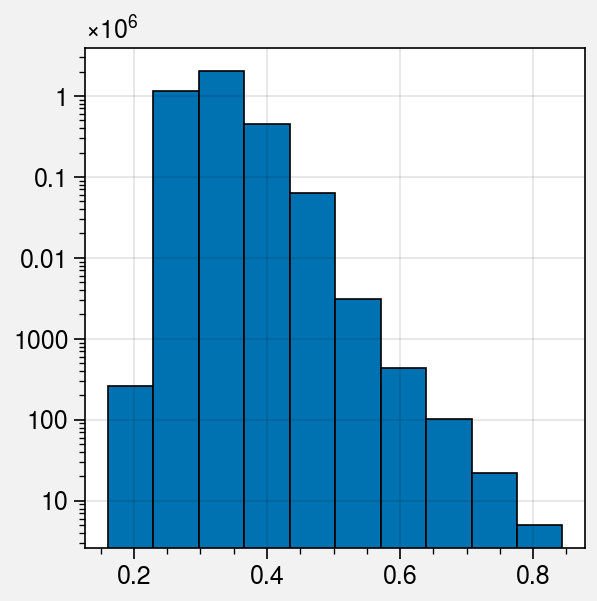

In [32]:
fig, axs = pplt.subplots()
axs.hist(d['MDET_T_RATIO'], log=True)

fig, axs = pplt.subplots()
axs.hist(d['MDET_T'], log=True)

In [88]:
m = meds.MEDS("DES0420-6039_r5366p01_r_pizza-cutter-slices.fits.fz")
m = meds.MEDS("DES0219-0541_r5366p01_r_pizza-cutter-slices.fits.fz")
m = meds.MEDS("DES0455-5123_r5366p01_r_pizza-cutter-slices.fits.fz")

In [100]:
msk = (
    (d["TILENAME"] == "DES0455-5123")
    & (d["MDET_T"] > 0.7)
    & (d["MDET_STEP"] == "noshear")
)

print(np.unique(d[msk]["TILENAME"]))

['DES0455-5123']


In [101]:
slice_ids = np.unique(d[msk]["SLICE_ID"])
print(len(slice_ids))

1


In [110]:
rc = fitsio.read("DES0455-5123_r5366p01_metadetect.fits.fz")

[0.72903329] [0.23858966] [11.20377421]
17
[1.21215854 1.36625128 1.57854323 1.56881321 1.34976297 1.52057128
 1.57176983 1.20124568 1.35696182 1.5648713  1.35156954 1.57994303
 1.56560929 1.28666216 1.35760553 1.56546223 1.57473031]


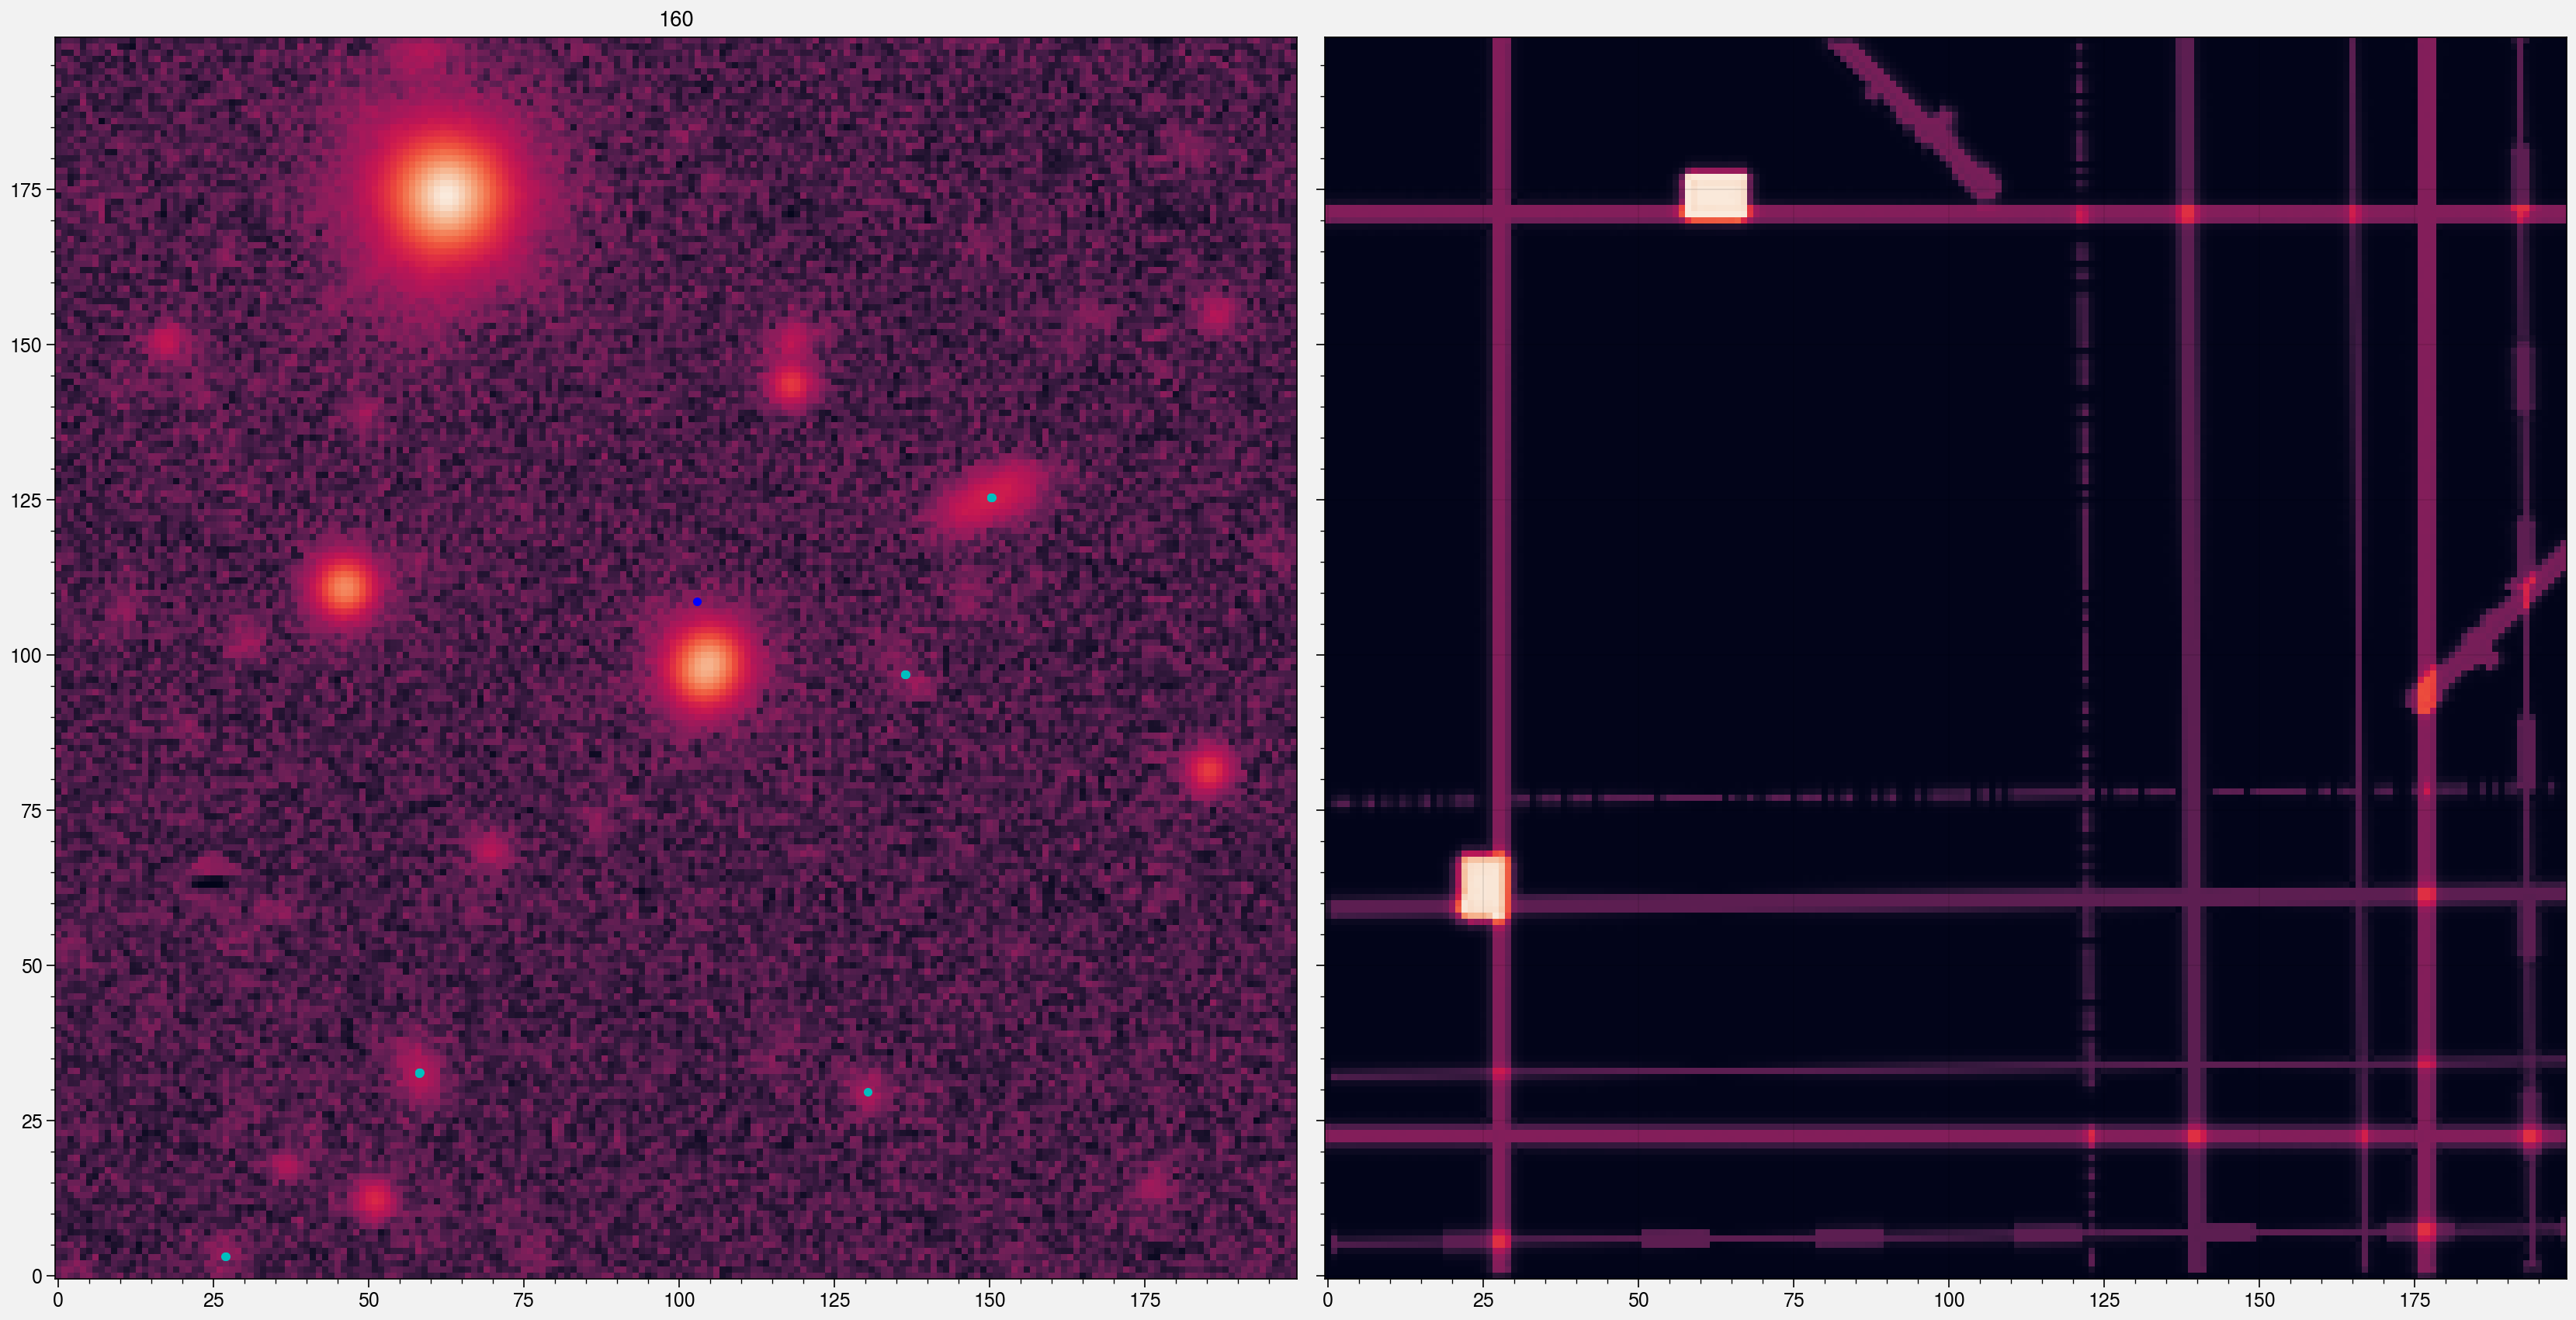

In [149]:
import sxdes

for i, slice_id in enumerate(slice_ids):
    
    # get the catalog and seg map using the convenience function
    
    img = m.get_cutout(slice_id, 0)
    wgt = m.get_cutout(slice_id, 0, type="weight")
    ormask = m.get_cutout(slice_id, 0, type="mfrac")
    fig, axs = pplt.subplots(refaspect=1, refwidth=8, nrows=1, ncols=2)
    ax = axs[0]
    ax.imshow(np.arcsinh(img * np.sqrt(wgt)), origin="lower", cmap="rocket")
    smsk = d[msk]["SLICE_ID"] == slice_id
    ax.plot(d[msk]["SLICE_COL"][smsk], d[msk]["SLICE_ROW"][smsk], "b.")
    print(d[msk]["MDET_T"][smsk], d[msk]["PSF_T"][smsk], d[msk]["MDET_S2N"][smsk])
    ax.grid(False)
    ax.format(title=slice_id)

#     cat, _ = sxdes.run_sep(img, 1.0/np.sqrt(wgt))
#     print(cat.shape)
#     ax.plot(cat["x"], cat["y"], "g.")
    
    rmsk = (
        (rc["slice_id"] == slice_id) & 
(
            (rc["mdet_T_ratio"] > 1.2) & (rc["mdet_s2n"] > 15)
        )
    )
    print(np.sum(rmsk))
    print(rc[rmsk]["mdet_T_ratio"])
    ax.plot(rc[rmsk]["slice_col"], rc[rmsk]["slice_row"], "c.")
    
#     omsk = (
#         (d["TILENAME"] == "DES0455-5123")
#         & (d["SLICE_ID"] == slice_id)
#     )
#     print(np.sum(omsk))
#     ax.plot(d[omsk]["SLICE_COL"], d[omsk]["SLICE_ROW"], "b.")
    
    ax = axs[1]
    ax.imshow(np.arcsinh(ormask), cmap="rocket", origin="lower")
    if i == 10:
        break

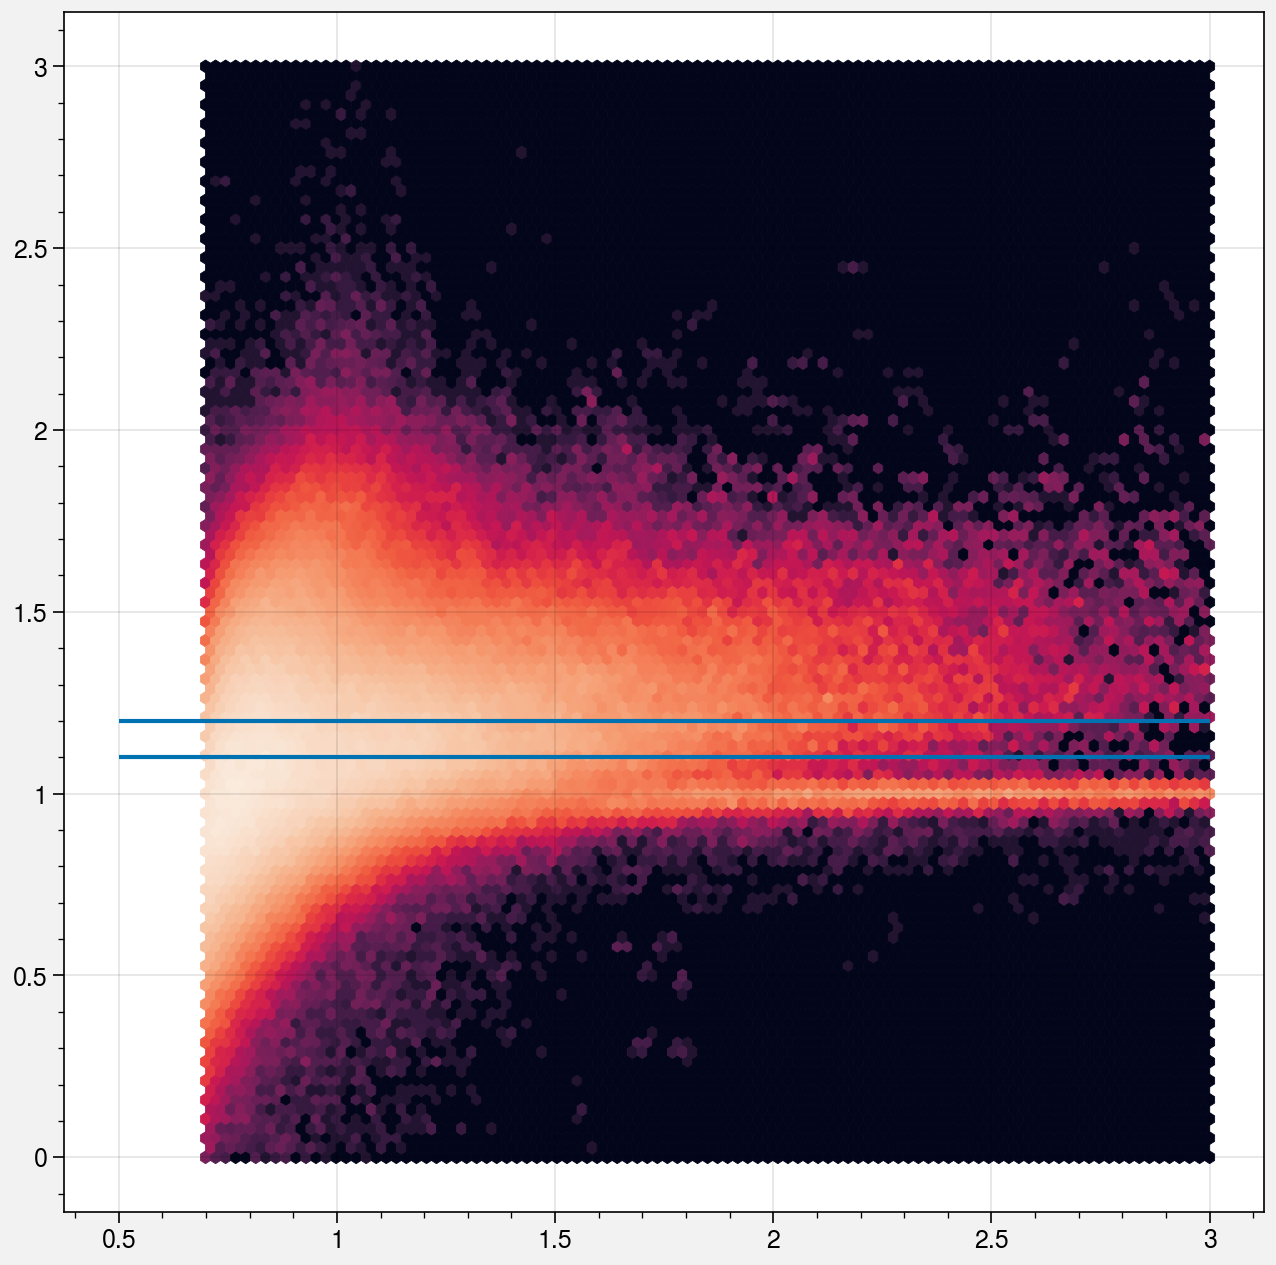

In [146]:
ppmsk = rc["flags"] == 0

fig, axs = pplt.subplots(refwidth=6)
axs.hexbin(
    np.log10(rc["mdet_s2n"][ppmsk]), 
    rc["mdet_T_ratio"][ppmsk], 
    bins='log', 
    cmap="rocket",
    extent=[np.log10(5), 3, 0.0, 3.0]
)
axs.hlines(1.1, 0.5, 3)
axs.hlines(1.2, 0.5, 3)

In [118]:
rc[rmsk]["mdet_T_ratio"]

array([1.07632492, 0.90627882, 1.57854323, 2.34884215, 1.06687424,
       3.05559471, 1.84983824, 1.51117348, 1.86384369, 1.66631459,
       1.43976156, 1.28525512, 1.11153127, 1.06221644, 0.88993959,
       1.52057128, 2.41594157, 1.06614899, 3.2803384 , 1.86988906,
       1.53622575, 1.66986532, 1.59289421, 1.39553059, 1.28083734,
       1.10527782, 1.09341651, 0.92989538, 1.61676222, 2.3943879 ,
       1.06762233, 3.06832865, 1.83384256, 1.50123792, 1.82724767,
       1.86567926, 1.47872271, 1.27355267, 1.11353175, 1.08085495,
       0.9200682 , 1.57994303, 2.36546841, 1.06789479, 2.99340753,
       1.50261816, 1.80906834, 1.70017525, 1.45388777, 1.20946566,
       1.10788091, 0.77115755, 1.0832726 , 1.2634856 , 1.56546223,
       2.37561843, 1.06587765, 2.93371794, 1.54825808, 1.9267562 ,
       1.72078215, 1.43151828, 1.38899448, 1.1152026 ])